<a href="https://colab.research.google.com/github/rauf358/Pytorch/blob/main/Going_Modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Going Modular

**Going modular** in deep learning (or programming in general) means organizing your code into **independent, reusable, and well-structured components** or modules. Instead of writing everything in one long script (which becomes hard to manage and debug), you break it down into logically separated parts.

### In PyTorch, going modular means:

You separate your code into files/modules like:

* `data_setup.py` → code to load and transform data
* `model_builder.py` → code to define and return models
* `engine.py` → training and evaluation functions
* `utils.py` → helper functions like plotting or saving results
* `train.py` or `main.py` → the script to run the full pipeline using everything above

### Benefits of going modular:

* **Reusability**: Easily reuse functions across different projects or experiments.
* **Clarity**: Each file has a clear role.
* **Scalability**: Easy to extend as your project grows.
* **Debuggability**: Easier to fix issues since each part is isolated.

It's a software engineering best practice applied to machine learning workflows.

Let me know if you'd like a [visual diagram](f) of a modular ML project structure or [sample folder layout](f).


## what are working towards



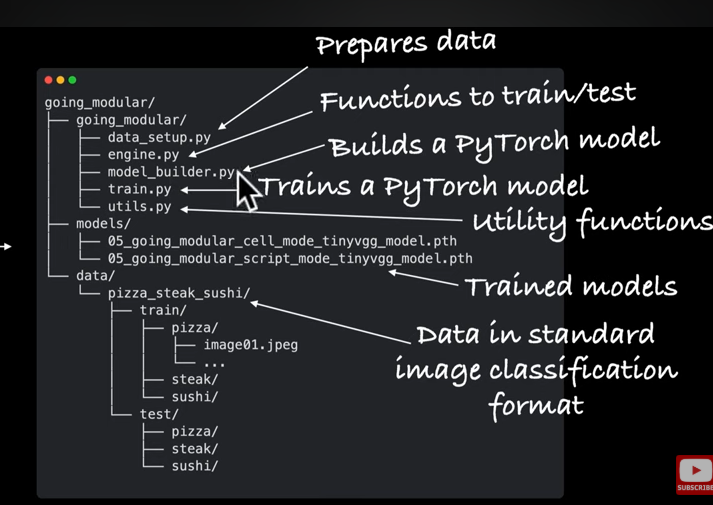

# Pytorch in the wild

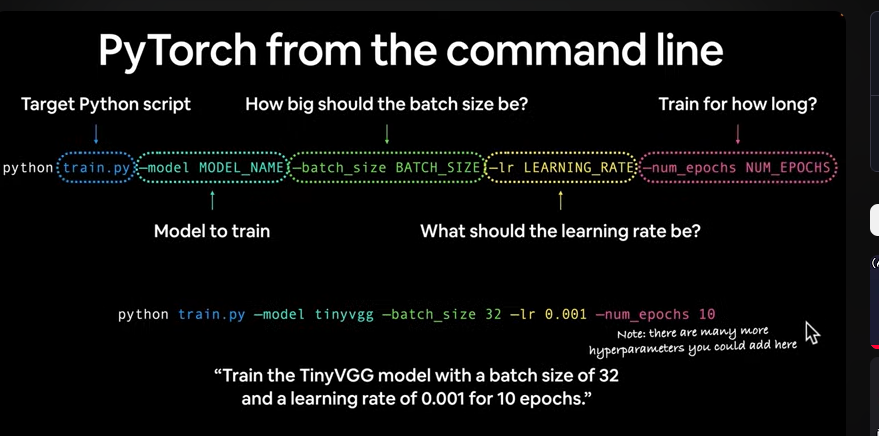

This image explains how to train a PyTorch model **directly from the command line** by passing **hyperparameters** as arguments to a Python script.

### Breakdown:

* **`python train.py`** → Runs the training script (`train.py`).
* **`--model`** → Specifies which model to train (e.g. `tinyvgg`).
* **`--batch_size`** → Sets the batch size (e.g. 32).
* **`--lr`** → Learning rate for the optimizer (e.g. 0.001).
* **`--num_epochs`** → How many times to loop over the dataset during training (e.g. 10).

### Full example:

```bash
python train.py --model tinyvgg --batch_size 32 --lr 0.001 --num_epochs 10
```

This tells PyTorch to:

> “Train the TinyVGG model with a batch size of 32, learning rate of 0.001, for 10 epochs.”

This method makes your training code **more flexible**—you don’t have to rewrite Python files to try different settings. You just change the command.

Let me know if you'd like a [template `train.py` structure](f) to support these arguments.


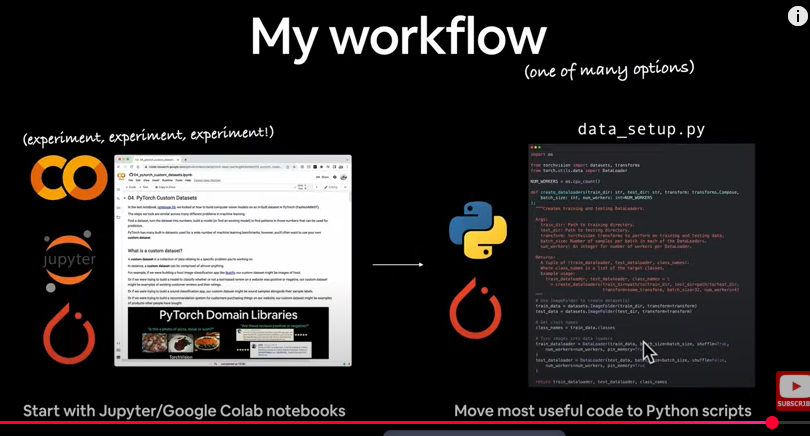

The image explains a **machine learning development workflow**, specifically for **PyTorch projects**, showing how experimentation evolves into modular and reusable code. Here's what it means:

---

### **Left Side: Jupyter/Colab Notebooks**

* **Purpose**: This is your *playground*. You start by *experimenting* with different ideas, models, datasets, and transformations.
* **Tools**:

  * Google Colab and Jupyter Notebooks let you quickly test small chunks of code.
  * Ideal for **trying new things**, **visualizing data**, and **debugging logic**.
* **Approach**: “Experiment, experiment, experiment!” – You try different settings, observe results, and iterate.

---

### **Right Side: Python Scripts**

* **Purpose**: Once your notebook experiments are stable and useful, you **convert** the core parts into reusable Python scripts.
* **Example Script**: `data_setup.py`

  * This script might contain functions to load data, create datasets and dataloaders, apply transforms, etc.
  * This makes your project cleaner and **modular** — easier to test, reuse, and share.
* **Toolchain**: You now use standard Python scripts (e.g., with `.py` files) instead of running everything in notebooks.

---

### **Why This Workflow Matters**

* Keeps **exploration** and **production code** separate.
* Helps you move from quick prototypes to **structured and reusable code**.
* Makes collaboration and deployment easier — others can use your scripts directly.

Let me know if you’d like a sample of what `data_setup.py` typically includes or [modular ML workflow](f).


**Script mode** refers to writing your Python code in **.py files** instead of directly in notebook cells.

---

### 🧱 What is Script Mode?

In **script mode**, you:

* Write reusable code (functions, classes, configs) inside separate `.py` files.
* Use these files by importing them into notebooks or other scripts.
* Keep notebooks clean and focused on high-level workflows or experiments.

---

### 📦 Example:

Instead of defining your model in a Jupyter cell:

```python
class TinyVGG(nn.Module):
    ...
```

You save it in `model_builder.py`:

```python
# model_builder.py
class TinyVGG(nn.Module):
    ...
```

Then in your notebook or training script:

```python
from model_builder import TinyVGG
```

---

### ✅ Benefits of Script Mode:

| Feature              | Benefit                                         |
| -------------------- | ----------------------------------------------- |
| 📁 Modular code      | Easier to maintain and scale projects           |
| 🔁 Reusability       | You can use the same file in many places        |
| 🧪 Testing ready     | Easier to write unit tests for individual files |
| 📉 Cleaner notebooks | Keeps notebooks uncluttered and focused         |

---

### 🔁 Ideal Workflow:

1. **Experiment** in notebook cells.
2. Once stable, **move the code** to a `.py` file (script mode).
3. **Import and reuse** wherever needed.

Would you like a [sample project structure](f) that uses script mode?


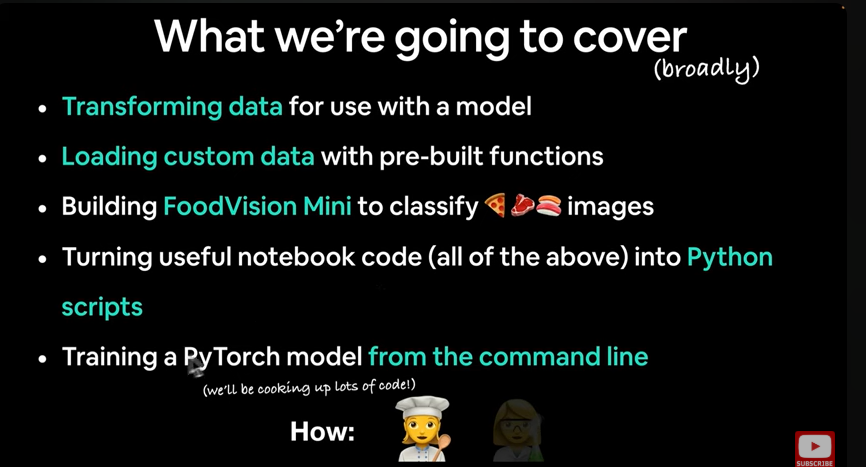

Here’s a clear breakdown of the **pros and cons of notebooks vs Python scripts**, highlighting their strengths and weaknesses based on your summary:

---

### 🧪 **Notebooks (e.g. Jupyter/Colab)**

| ✅ Pros                              | ❌ Cons                                                     |
| ----------------------------------- | ---------------------------------------------------------- |
| Easy to experiment and get started  | Versioning with Git is hard (cell-based diffing)           |
| Great for step-by-step learning     | Hard to reuse only part of a notebook                      |
| Very visual (graphs, images inline) | Can become messy with too many outputs or markdown clutter |
| Easy to share (e.g. via links)      | Not ideal for large projects or production                 |

---

### ⚙️ **Python Scripts (.py)**

| ✅ Pros                                         | ❌ Cons                                           |
| ---------------------------------------------- | ------------------------------------------------ |
| Code reuse: Easily modularize and import logic | Less interactive — can’t run single parts easily |
| Better for version control with Git            | Not as beginner-friendly or visual               |
| Common in open-source and production workflows | Visualizations/logs require manual setup         |
| Cloud-ready: easier to deploy and automate     | Less flexible for fast iteration                 |

---

### 🔁 Best Practice:

Start with **notebooks to experiment**, then move stable code into **scripts for reuse and scaling** — a hybrid workflow often works best.

Let me know if you want a [comparison chart](f) or [workflow diagram](f) to visualize this.


# 1. Get data

In [ ]:
import os
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# Remove zip file
os.remove(data_path / "pizza_steak_sushi.zip")

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


# 2. Create Datasets and DataLoaders (data_setup.py)


Once we've got data, we can then turn it into PyTorch Dataset's and DataLoader's (one for training data and one for testing data).

We convert the useful Dataset and DataLoader creation code into a function called create_dataloaders().

And we write it to file using the line %%writefile going_modular/data_setup.py.

In [ ]:
import torchvision
import torch
import os

https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [ ]:
NUM_WORKERS=os.cpu_count()
NUM_WORKERS

2

In [ ]:
os.makedirs("going_modular")

In [ ]:
%%writefile going_modular/data_Set.py
"""
contians functionality for creating PyTorch DataLoader's for image classification data.
"""
import os
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

NUM_WORKERS=os.cpu_count()

def create_dataloaders(
    train_dir:str,
    test_dir:str,
    transforms:transforms.Compose,
    batch_size:int,
    num_workers: int=NUM_WORKERS):

  """
  this funtion creates data loaders for train and
  test data sets

  """
  #use Imagefolder to create datasets
  train_data=datasets.ImageFolder(train_dir,transform=transforms)
  test_data=datasets.ImageFolder(test_dir,transform=transforms)

  #get class# names
  class_names=train_data.classes
  #data loaders
  train_dataloader=DataLoader(train_data,
                              batch_size=batch_size,
                              num_workers=num_workers,
                              pin_memory=True)
  test_dataloader=DataLoader(test_data,
                             batch_size=batch_size,
                             num_workers=num_workers,
                             pin_memory=True)

  return train_dataloader,test_dataloader, class_names



Writing going_modular/data_Set.py


In [ ]:
from torchvision import transforms
data_transform=transforms.Compose(
  [transforms.Resize((64,64)),
  transforms.ToTensor]
 )

In [ ]:
import going_modular
from going_modular import data_Set
train_dataloader,test_dataloader,class_names=data_Set.create_dataloaders(
   train_dir='/content/data/pizza_steak_sushi/train',
   test_dir='/content/data/pizza_steak_sushi/test',
   batch_size=32,
   transforms=data_transform

)
train_dataloader,test_dataloader,class_names

(<torch.utils.data.dataloader.DataLoader at 0x790000f47d50>,
 ['pizza', 'steak', 'sushi'])

# 3. Making a model (model_builder.py)

Over the past few notebooks (notebook 03 and notebook 04), we've built the TinyVGG model a few times.

So it makes sense to put the model into its file so we can reuse it again and again.

Let's put our TinyVGG() model class into a script with the line %%writefile going_modular/model_builder.py:

In [ ]:
%%writefile going_modular/model_builder.py

"""
this builds the model and returns it

"""
import torch
from torch import nn

import torch
from torch import nn

class TinyVGG(nn.Module):
  """Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from the CNN explainer website in PyTorch.
  See the original architecture here: https://poloclub.github.io/cnn-explainer/

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                        stride=2)
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          # Where did this in_features shape come from?
          # It's because each layer of our network compresses and changes the shape of our inputs data.
          nn.Linear(in_features=hidden_units*13*13,
                    out_features=output_shape)
      )

  def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      x = self.conv_block_2(x)
      x = self.classifier(x)
      return x
      # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

Writing going_modular/model_builder.py


In [ ]:
import torch
from going_modular import model_builder
device="cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
model=model_builder.TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

# 4. Creating train_step() and test_step() functions and train() to combine them

We wrote several training functions in notebook 04:

train_step() - takes in a model, a DataLoader, a loss function and an optimizer and trains the model on the DataLoader.
test_step() - takes in a model, a DataLoader and a loss function and evaluates the model on the DataLoader.
train() - performs 1. and 2. together for a given number of epochs and returns a results dictionary.
Since these will be the engine of our model training, we can put them all into a Python script called engine.py with the line %%writefile going_modular/engine.py:

In [ ]:
%%writefile going_modular/engine.py
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  # Return the filled results at the end of the epochs
  return results

Writing going_modular/engine.py


In [ ]:
from going_modular import engine

# 5. Creating a function to save the model (utils.py)
Often you'll want to save a model whilst it's training or after training.

Since we've written the code to save a model a few times now in previous notebooks, it makes sense to turn it into a function and save it to file.

It's common practice to store helper functions in a file called utils.py (short for utilities).

Let's save our save_model() function to a file called utils.py with the line %%writefile going_modular/utils.py:

In [ ]:
%%writefile going_modular/utils.py
"""
Contains various utility functions for PyTorch model training and saving.
"""
import torch
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)

Writing going_modular/utils.py


Here's a structured, easy-to-understand breakdown of creating the `train.py` script without code formatting:

---

### **Building `train.py`: The Complete Training Script**

#### **Purpose**
- Combines all modular components into one executable file
- Allows training with a single command: `python train.py`
- Makes the pipeline reproducible and shareable

#### **Key Components Used**
1. `data_setup.py` - For creating DataLoaders
2. `model_builder.py` - For model architecture
3. `engine.py` - Training/evaluation functions
4. `utils.py` - Model saving functionality

---

### **Implementation Steps**

#### **1. Setup Phase**
- **Import dependencies**:
  - Core PyTorch modules
  - Our custom modular scripts
- **Set hyperparameters**:
  - Epochs, batch size, learning rate
  - Model configuration (hidden units)
  - Data directories

#### **2. Hardware Configuration**
- Automatic device detection (CPU/GPU)
- Ensures code runs on available hardware

#### **3. Data Preparation**
- Create image transformations
- Generate DataLoaders:
  - Training set with shuffling
  - Test set for evaluation
  - Automatic class detection

#### **4. Model Initialization**
- Instantiate model from `model_builder`
- Move model to target device (CPU/GPU)
- Print model summary for verification

#### **5. Training Setup**
- Define loss function (typically CrossEntropy for classification)
- Initialize optimizer (usually Adam)
- Optionally add learning rate scheduler

#### **6. Execution Phase**
- Run training loop via `engine.train()`
- Automatic progress tracking
- Live metrics printing (loss/accuracy)
- Simultaneous validation during training

#### **7. Post-Training**
- Save trained model weights
- Store to specified directory
- Automatic filename validation

---

### **Key Benefits**
1. **Reproducibility**: Same results on any machine
2. **Portability**: No notebook environment required
3. **Scalability**: Easy to modify for different projects
4. **Standardization**: Follows PyTorch best practices

---

### **Future Improvements**
- Add command-line argument support
- Implement logging
- Add early stopping
- Include model export options

This structure keeps all training logic in one place while maintaining modularity through imported components.


In [ ]:
%%writefile going_modular/train.py
"""
Trains a PyTorch image classification model using device-agnostic code.
"""

import os
import torch
import data_Set, engine, model_builder, utils

from torchvision import transforms

# Setup hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

# Setup directories
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"

# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_Set.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=BATCH_SIZE,
    transforms=data_transform
)

# Create model with help from model_builder.py
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

# Set loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# Save the model with help from utils.py
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")

Overwriting going_modular/train.py


In [ ]:
!python going_modular/train.py

  0% 0/5 [00:00<?, ?it/s]Epoch: 1 | train_loss: 1.1973 | train_acc: 0.3047 | test_loss: 1.1596 | test_acc: 0.2604
 20% 1/5 [00:01<00:07,  1.93s/it]Epoch: 2 | train_loss: 1.1085 | train_acc: 0.3047 | test_loss: 1.1263 | test_acc: 0.2604
 40% 2/5 [00:02<00:03,  1.27s/it]Epoch: 3 | train_loss: 1.0989 | train_acc: 0.3047 | test_loss: 1.1064 | test_acc: 0.2604
 60% 3/5 [00:03<00:02,  1.07s/it]Epoch: 4 | train_loss: 1.0960 | train_acc: 0.3047 | test_loss: 1.0951 | test_acc: 0.2604
 80% 4/5 [00:04<00:00,  1.03it/s]Epoch: 5 | train_loss: 1.0951 | train_acc: 0.4375 | test_loss: 1.0879 | test_acc: 0.5417
100% 5/5 [00:05<00:00,  1.04s/it]
[INFO] Saving model to: models/05_going_modular_script_mode_tinyvgg_model.pth


https://realpython.com/command-line-interfaces-python-argparse/